# 1. Project Title: IPL Matches(2008-2024) Data Analysis
### Submitted by: Shivam Gupta
### Date: 30th January 2025

# 2. Aim & Objective

### Analyze IPL match data to identify the following trends:
#### Team Performances, 
#### Player Statistics, 
#### Venue Insights, 
#### Toss and Winning Patterns, and 
#### Other Match-Winning factors.

## 3. Roadmap

#### 1. Load and clean dataset
#### 2. Perform exploratory data analysis (EDA)
#### 3. Visualize key insights
#### 4. Summarize findings

## 3.1 Let's load and clean the dataset  

In [188]:
# Let's import all the necessary libraries of python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [189]:
df=pd.read_csv("matches.csv")
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [190]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [191]:
df.shape

(1095, 20)

In [192]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [193]:
df.duplicated().sum()  # Here we can see that the dataset do not have any duplicate values.

0

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### Treating Null Values 

In [196]:
df.isnull().sum() # Let's find how many null values does the dataset columns have? 

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

### Here we fill all the null values in the columns: 
* City
* Player_of_Match
* Winner
* Result_Margin
* Target_Runs
* Target_Overs
* Method  

In [198]:
#Let's remove the null values from "city" columns
df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [199]:
# Here we can observe that city cells are blank in year 2014 and 2020 i.e., when the IPL has been scheduled in UAE, so let's fill the city accordingly  

df[df['city'].isna()].loc[:,['date','venue']]

,date,venue
399,2014-04-17,Sharjah Cricket Stadium
402,2014-04-19,Dubai International Cricket Stadium
403,2014-04-19,Dubai International Cricket Stadium
404,2014-04-20,Sharjah Cricket Stadium
406,2014-04-22,Sharjah Cricket Stadium
407,2014-04-23,Dubai International Cricket Stadium
408,2014-04-24,Sharjah Cricket Stadium
409,2014-04-25,Dubai International Cricket Stadium
410,2014-04-25,Dubai International Cricket Stadium
413,2014-04-27,Sharjah Cricket Stadium


In [200]:
df.loc[(df['venue']=='Sharjah Cricket Stadium') & (df['city'].isnull()),'city']='Sharjah'       
df.loc[(df['venue']=='Dubai International Cricket Stadium') & (df['city'].isnull()),'city']='Dubai'

In [201]:
df.groupby("result")['player_of_match'].unique() #Here we can see that result which have null values are the matches which do not have specific result. So let's fill the null values with 'No Result'.

result
no result                                                [nan]
runs         [BB McCullum, MEK Hussey, ML Hayden, KC Sangak...
tie          [YK Pathan, J Theron, GH Vihari, V Kohli, JP F...
wickets      [MF Maharoof, MV Boucher, DJ Hussey, SR Watson...
Name: player_of_match, dtype: object

In [202]:
df['player_of_match'].fillna("no result", inplace =True)

In [203]:
df['winner'].fillna("no result", inplace =True)

In [204]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [205]:
# Calculate mean values
mean_runs = df.loc[df['result'] == 'runs', 'result_margin'].dropna().mean()
mean_wickets = df.loc[df['result'] == 'wickets', 'result_margin'].dropna().mean()

# Replace null values in result_margin
df.loc[(df['result'] == 'runs') & (df['result_margin'].isnull()), 'result_margin'] = mean_runs
df.loc[(df['result'] == 'wickets') & (df['result_margin'].isnull()), 'result_margin'] = mean_wickets

In [206]:
df['target_runs'].fillna(df['target_runs'].mean(), inplace =True)

In [207]:
df['target_overs'].fillna(df['target_overs'].mean(), inplace =True)

In [208]:
# Here we are replacing the old team names to that of new team names.

columns_to_update = ['team1', 'team2', 'toss_winner', 'winner']

for i in columns_to_update:
    df[i]=df[i].replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")

In [209]:
columns_to_update = ['team1', 'team2', 'toss_winner', 'winner']

for i in columns_to_update:
    df[i]=df[i].replace("Kings XI Punjab","Punjab Kings")

In [210]:
columns_to_update = ['team1', 'team2', 'toss_winner', 'winner']

for i in columns_to_update:
    df[i]=df[i].replace("Delhi Daredevils","Delhi Capitals")

In [211]:
columns_to_update = ['team1', 'team2', 'toss_winner', 'winner']

for i in columns_to_update:
    df[i]=df[i].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [212]:
df['winner'].value_counts()  # Let's check if we got all the names right and latest. 

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Rajasthan Royals               112
Punjab Kings                   112
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
no result                        5
Name: count, dtype: int64

In [213]:
df['method'].value_counts() # Here we can see the method deals with whether the match has been decided on DLS basis or not. So let's fill the regular matches with the term 'Normal'.

method
D/L    21
Name: count, dtype: int64

In [214]:
df['method'].fillna("Normal", inplace =True) 

#### Here we can see that we've successfully removed all the null values from the dataset.

In [216]:
df.isnull().sum() 

id                  0
season              0
city                0
date                0
match_type          0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin      19
target_runs         0
target_overs        0
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

### Section 1: Team Performance related questions

#### Ques1. Which team has won most finals?

In [221]:
onlyfinals=df[df['match_type']=='Final']

In [222]:
onlyfinals['winner'].value_counts()
nofl=onlyfinals['winner'].value_counts().max()
twfl=onlyfinals['winner'].mode()
print(f"{twfl} have won most finals {nofl}")

0    Chennai Super Kings
1         Mumbai Indians
Name: winner, dtype: object have won most finals 5


#### Ques2. Which team has won the most matches overall?


In [224]:
#The dataset only contains the matches which have definite results 
ref_df=df.loc[(df['result']=='runs') | (df['result']=='wickets')] #refined data excluding the tie or super-over result
ref_df['result'].value_counts()

result
wickets    578
runs       498
Name: count, dtype: int64

In [225]:
df['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [226]:
No_result_matches = df[df['result']=='no result'] # This dataset has matches with no result that will be helpful in upcoming sections
No_result_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,no result,Feroz Shah Kotla,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,no result,NaN,165.684066,19.759341,N,Normal,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,no result,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,no result,no result,NaN,165.684066,19.759341,N,Normal,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,no result,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Delhi Capitals,Royal Challengers Bengaluru,field,no result,no result,NaN,188.000000,20.000000,N,Normal,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,no result,M.Chinnaswamy Stadium,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,no result,no result,NaN,63.000000,5.000000,N,Normal,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,no result,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,no result,no result,NaN,165.684066,19.759341,N,Normal,AK Chaudhary,NA Patwardhan


In [227]:
wins_by_team =(ref_df['winner'].value_counts())
team_wins=(ref_df['winner'].value_counts()).idxmax()
no_of_matches=(ref_df['winner'].value_counts()).max()

print(f"Team {team_wins} has won the most matches i.e., {no_of_matches} matches in the IPL history")

Team Mumbai Indians has won the most matches i.e., 142 matches in the IPL history


#### Ques3. What is the win percentage of each team?

In [229]:
total_matches = ref_df['team1'].value_counts() + ref_df['team2'].value_counts()
total_matches.sort_values(ascending=False)
win_perc=wins_by_team/total_matches*100
win_perc.sort_values(ascending=False)

Gujarat Titans                 62.222222
Chennai Super Kings            58.474576
Lucknow Super Giants           55.813953
Mumbai Indians                 55.252918
Kolkata Knight Riders          52.631579
Rajasthan Royals               50.925926
Rising Pune Supergiants        50.000000
Sunrisers Hyderabad            48.876404
Royal Challengers Bengaluru    48.594378
Delhi Capitals                 45.528455
Punjab Kings                   45.041322
Gujarat Lions                  44.827586
Kochi Tuskers Kerala           42.857143
Deccan Chargers                38.666667
Pune Warriors                  26.666667
Name: count, dtype: float64

#### Ques4. Which team performs best at their home ground?

In [245]:
print(ref_df['city'].unique())  # Let's find out the unique cities and winners from the dataset 
print(ref_df['winner'].unique())

['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' 'Dubai' 'Rajkot' 'Kanpur' 'Bengaluru' 'Navi Mumbai'
 'Lucknow' 'Guwahati' 'Mohali']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Gujarat Titans' 'Lucknow Super Giants']


In [247]:
home_grounds={
    'Mumbai Indians': 'Mumbai',
    'Chennai Super Kings': 'Chennai',
    'Kolkata Knight Riders': 'Kolkata',
    'Royal Challengers Bangalore': 'Bangalore',
    'Delhi Capitals': 'Delhi',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Punjab Kings': 'Dharamsala',
    'Rajasthan Royals': 'Jaipur',
    'Lucknow Super Giants': 'Lucknow',
    'Gujarat Titans': 'Ahmedabad',
    'Sunrisers Hyderabad': 'Hyderabad'
}

home_matches =ref_df[ref_df['winner'].map(home_grounds)==ref_df['city']]
home_matches['winner'].value_counts()   # Here we've mapped the cities along with their homegrounds and concluded about the asked question.

winner
Mumbai Indians           63
Kolkata Knight Riders    52
Chennai Super Kings      50
Rajasthan Royals         37
Delhi Capitals           36
Sunrisers Hyderabad      35
Gujarat Titans            9
Lucknow Super Giants      7
Punjab Kings              5
Name: count, dtype: int64

## Section2: Player performance

#### Ques5. Who are the top players with the most "Player of the Match" awards?


In [235]:
top_players=df['player_of_match'].value_counts()
top_player=top_players.idxmax()
most_awards = top_players.max()
top_player
print(f"The top player is {top_player} with {most_awards} Player of the match awards")

The top player is AB de Villiers with 25 Player of the match awards


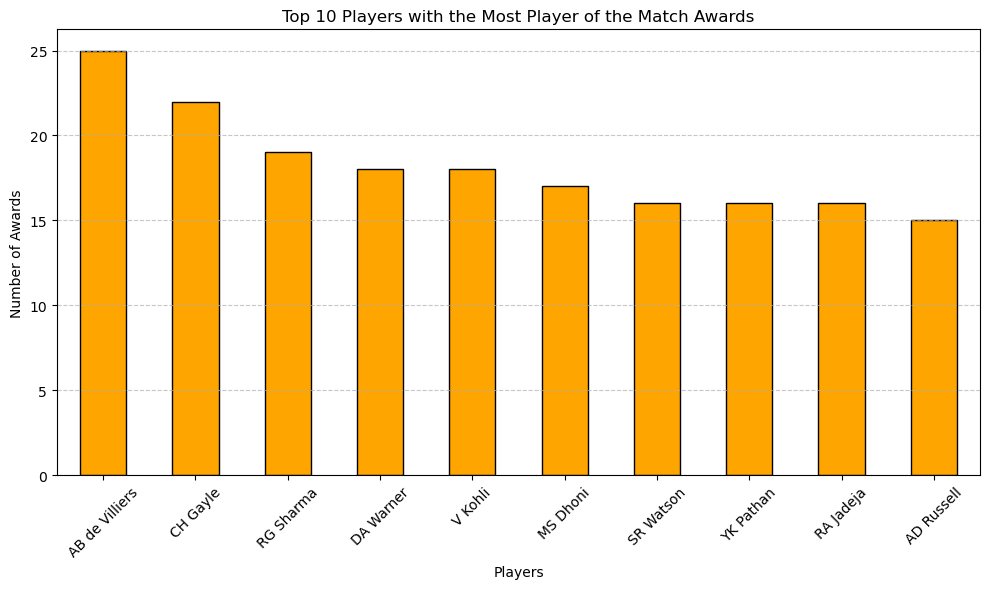

In [458]:
most_awards=df['player_of_match'].value_counts()  # This visualization will give you the top 10 players who have won the most player of the match awards
top_10_players = most_awards.head(10)

plt.figure(figsize=(10, 6))
top_10_players.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Players with the Most Player of the Match Awards')
plt.xlabel('Players')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Ques6 - Does a particular player’s performance correlate with team victories in certain venues or cities?

In [251]:
player_perf=ref_df.groupby(["player_of_match", "winner", "venue",]).size().reset_index(name='count')
top_performers = player_perf.sort_values(by='count',ascending=False)
top_performers.head(1) 

,player_of_match,winner,venue,count
145,CH Gayle,Royal Challengers Bengaluru,M Chinnaswamy Stadium,9


* Here we can say that if the venue is M Chinnaswamy Stadium and if the CH Gayle is in the team, it is more likely that the team is going to win and the player of the match award is more likely to go to CH Gayle 

## Section3: Venue Insights 

#### Ques7. Which venue hosts the most matches?

In [241]:
venues=df['venue'].value_counts()
venue_name=venues.idxmax()
matches=venues.max()

print(f"{venue_name} hosts the most matches i.e, {matches}.")

Eden Gardens hosts the most matches i.e, 77.


#### Ques8. Which are the most high scoring venues? Give top 10 venues.

In [474]:
high_sc_ven=ref_df.loc[:,['venue','target_runs']].sort_values('target_runs',ascending=False)
high_sc_ven=high_sc_ven.head(10)
high_sc_ven

,venue,target_runs
1053,"M Chinnaswamy Stadium, Bengaluru",288
1031,"Rajiv Gandhi International Stadium, Uppal, Hyd...",278
1039,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,273
1058,"Arun Jaitley Stadium, Delhi",267
352,M Chinnaswamy Stadium,264
1065,"Eden Gardens, Kolkata",262
987,"Punjab Cricket Association IS Bindra Stadium, ...",258
1066,"Arun Jaitley Stadium, Delhi",258
560,M Chinnaswamy Stadium,249
146,"MA Chidambaram Stadium, Chepauk",247


### Section4: Toss and Winning Patterns

#### Ques9. What are the most common toss decisions (bat/field)

In [321]:
ctd = df['toss_decision'].value_counts()
print(f'The most common decision is to choose {ctd.idxmax()}ing.')

The most common decision is to choose fielding.


#### Ques10. Is batting first or chasing more successful in finals?

In [296]:
onlyfinals['result'].value_counts()

result
runs       9
wickets    8
Name: count, dtype: int64

* Conclusion

Here we can see that while defending 9 matches have been won and while chasing 8 matches have been won. So we can say that batting first can be more successful than chasing in finals.

#### Ques11. What is the percentage of matches won while chasing and while defending?


##### While Chasing

In [304]:
chasing_count=(ref_df[ref_df['result']=='wickets'])["winner"].count()

In [333]:
chasing_perc=chasing_count/1076*100
print(f'The percentage of matches won while chasing the score is {round(chasing_perc,2)} %')

The percentage of matches won while chasing the score is 53.72 %


##### While Defending

In [335]:
defending_perc=100-chasing_perc
print(f'The percentage of matches won while defending the score is {round(defending_perc,2)} %.')

The percentage of matches won while defending the score is 46.28 %.


#### Ques12. Which team wins matches more often when they win the toss? 

In [339]:
a=ref_df[ref_df['toss_winner']== ref_df['winner']]['winner'].value_counts().max()
b=ref_df[ref_df['toss_winner']== ref_df['winner']]['winner'].value_counts().idxmax()

print(f"{b} has won {a} which is the maximum when they win the toss.")

Mumbai Indians has won 77 which is the maximum when they win the toss.


#### Ques13. Which team has the highest win percentage when they win the toss? 

In [341]:
toss_and_match_winner = ref_df[ref_df['toss_winner']== ref_df['winner']]
toss_wins=ref_df['toss_winner'].value_counts()
match_wins_after_toss=toss_and_match_winner['toss_winner'].value_counts()
win_perc=( match_wins_after_toss/toss_wins*100).sort_values(ascending=False)

highest_perc_team = win_perc.idxmax()
higest_value = round(win_perc.max(),2)
print(f"The team with the highest win percentage when they win the toss is {highest_perc_team}, with a win percentage of {higest_value} %")

The team with the highest win percentage when they win the toss is Gujarat Lions, with a win percentage of 71.43 %


In [345]:
round(win_perc,2) # Here's the complete list of toss win- match win pairs.

toss_winner
Gujarat Lions                  71.43
Gujarat Titans                 63.64
Chennai Super Kings            62.50
Rising Pune Supergiants        61.54
Kolkata Knight Riders          56.20
Mumbai Indians                 55.00
Lucknow Super Giants           52.63
Royal Challengers Bengaluru    50.85
Rajasthan Royals               50.43
Kochi Tuskers Kerala           50.00
Delhi Capitals                 46.46
Deccan Chargers                44.19
Sunrisers Hyderabad            43.68
Punjab Kings                   41.12
Pune Warriors                  15.00
Name: count, dtype: float64

## Section5 - Match Results Analysis and Trends

#### Ques14. What is the highest team score in IPL history?

In [349]:
#Here we convert few float data types into int types
intdtypes = ['target_overs','target_runs','result_margin']

for i in intdtypes:
    ref_df[i]=ref_df[i].astype(int)

ref_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1076 non-null   int64 
 1   season           1076 non-null   object
 2   city             1076 non-null   object
 3   date             1076 non-null   object
 4   match_type       1076 non-null   object
 5   player_of_match  1076 non-null   object
 6   venue            1076 non-null   object
 7   team1            1076 non-null   object
 8   team2            1076 non-null   object
 9   toss_winner      1076 non-null   object
 10  toss_decision    1076 non-null   object
 11  winner           1076 non-null   object
 12  result           1076 non-null   object
 13  result_margin    1076 non-null   int32 
 14  target_runs      1076 non-null   int32 
 15  target_overs     1076 non-null   int32 
 16  super_over       1076 non-null   object
 17  method           1076 non-null   objec

In [351]:
print(ref_df['target_runs'].max(),"runs is the highest ever total in the IPL history")

288 runs is the highest ever total in the IPL history


#### Ques15. How many matches in IPL history encountered super-over and which team has won the most super-overs?

In [353]:
df['super_over'].value_counts()  # Let's find the dataset with all the super over matches

super_over
N    1081
Y      14
Name: count, dtype: int64

In [382]:
df[df['super_over']=="Y"]['winner'].value_counts()

winner
Punjab Kings                   3
Delhi Capitals                 3
Rajasthan Royals               2
Royal Challengers Bengaluru    2
Mumbai Indians                 2
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
Name: count, dtype: int64

* Here Punjab Kings have won the most super overs i.e., 3 matches

####    Ques15. Which type of match (e.g., league, playoff) has the most number of wins by a specific team? 


In [217]:
df['match_type'].value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Qualifier 2             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

In [444]:
ref_df.head()
match_type_wins = ref_df.groupby(['match_type','winner']).size().reset_index(name='win_count')
most_wins_per_team = match_type_wins.loc[match_type_wins.groupby('winner')['win_count'].idxmax()].sort_values(by='win_count', ascending=False)
most_wins_per_team

,match_type,winner,win_count
26,League,Mumbai Indians,129
18,League,Chennai Super Kings,121
24,League,Kolkata Knight Riders,120
31,League,Royal Challengers Bengaluru,115
20,League,Delhi Capitals,110
28,League,Punjab Kings,108
29,League,Rajasthan Royals,105
32,League,Sunrisers Hyderabad,81
19,League,Deccan Chargers,27
22,League,Gujarat Titans,25


Hence Mumbai Indians have won the maximum 129 League Matches 

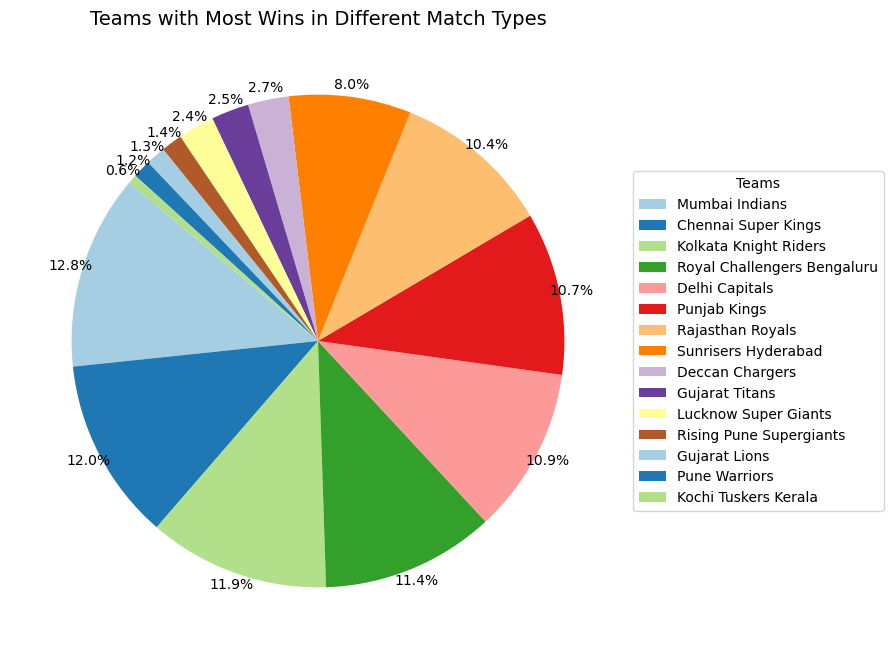

In [454]:
plt.figure(figsize=(10, 8))
plt.pie(
    most_wins_per_team['win_count'],  
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors,
    pctdistance=1.05)
plt.legend(most_wins_per_team['winner'], title="Teams", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Teams with Most Wins in Different Match Types", fontsize=14)
plt.show()

#### Ques16. What are the most common winning margins (by runs/wickets)?

In [402]:
runs = ref_df[ref_df['result']=="runs"]['result_margin'].value_counts().idxmax()
runs_no_of_times =ref_df[ref_df['result']=="runs"]['result_margin'].value_counts().max()
print(f"The most common winning margin according to runs is {runs} runs with maximum of {runs_no_of_times} results.")


wickets = ref_df[ref_df['result']=="wickets"]['result_margin'].value_counts().idxmax()
wickets_no_of_times =ref_df[ref_df['result']=="wickets"]['result_margin'].value_counts().max()
print(f"The most common winning margin according to wickets is {wickets} wickets with maximum of {wickets_no_of_times} results.")

The most common winning margin according to runs is 10 runs with maximum of 17 results.
The most common winning margin according to wickets is 6 wickets with maximum of 120 results.


#### Ques17. Which team has won most matches and how many times when the match proceeds with D/L method?


In [404]:
match_with_dl=df[df['method']=='D/L']['winner'].value_counts()
team_won_in_dl_match = match_with_dl.idxmax()
total_matches_won_by_DL = df[df['method']=='D/L']['winner'].value_counts().max()
print("The team that has won maximum matches in D/L matches is",team_won_in_dl_match,"and has won total",total_matches_won_by_DL,"matches")

The team that has won maximum matches in D/L matches is Kolkata Knight Riders and has won total 4 matches


####    Ques18. Which team has the most dramatic wins (highest result margin)?


In [406]:
maximum_result_margin = ref_df.loc[:,['winner','result_margin']]['result_margin'].max()
team_with_maximum_result_margin = ref_df[ref_df['result_margin']==146]['winner'].max()
print("The team which has highest result margin victory is :",team_with_maximum_result_margin,"with margin of",maximum_result_margin,"runs" )

The team which has highest result margin victory is : Mumbai Indians with margin of 146 runs


####    Ques19. What is the average margin of victory for each team?


In [408]:
print("The average margin victory by runs is :",round(ref_df[ref_df['result']=='runs']['result_margin'].mean()),"runs")
print("The average margin victory by wickets is :",round(ref_df[ref_df['result']=='wickets']['result_margin'].mean()),"wickets")

The average margin victory by runs is : 30 runs
The average margin victory by wickets is : 6 wickets


#### Ques.20 What is the success rate of toss winners?

In [416]:
twmw = ref_df[ref_df['toss_winner']==ref_df['winner']]
twmw=twmw['winner'].count()
twmw # Here we get the total toss won match won pairs.

548

In [420]:
toss_win_perc=twmw/1076*100
print(f'The success rate of toss winner is {round(toss_win_perc,2)}%')

The success rate of toss winner is 50.93%


#### Ques21. What is the largest win margin by runs or wickets?

In [414]:
largest_win_byruns = ref_df[ref_df['result']=='runs']['result_margin'].max()

largest_win_bywickets = ref_df[ref_df['result']=='wickets']['result_margin'].max()



print(f"The largest wins by runs is: {largest_win_byruns} runs")
print(f"The largest wins by runs is: {largest_win_bywickets} wickets")


The largest wins by runs is: 146 runs
The largest wins by runs is: 10 wickets
